Loss of train: [299.2492325298648, 297.3856218161788, 295.01948002527968, 292.09808041645567, 289.63325445516165, 287.21706116948002, 284.25698171960437, 281.12614476530786, 278.19770850732169, 275.60038489869237, 273.79237431477895, 272.31596642788486, 270.13592873446191, 267.99059111782674, 265.65071600865986, 263.1291482957381, 261.01475831115658, 259.01982817672632, 256.04421498353003, 253.98534442994614, 252.92614935920835, 250.79937539550798, 249.11176450682805, 247.29720677726584, 245.25328879607591, 243.77652631152725, 241.52244431982589, 239.89507306080606, 237.7377007695921, 235.31262990894268, 233.75158354848213, 231.79699507416862, 229.68780383937724, 227.38631081023718, 225.87358766079828, 223.29850303509664, 220.87943050399903, 219.05189486287199, 216.98701428989116, 215.27364909552162, 214.07684818510157, 211.70589766074477, 209.77762181624027, 208.15023703286164, 206.46292554759859, 205.0935216844565, 203.4663617898928, 202.67862912271096, 200.92900211835979, 199.041439

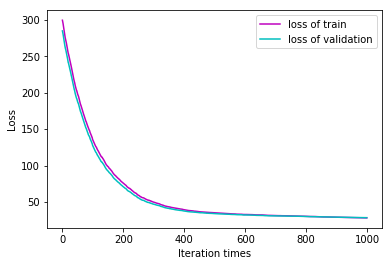

In [4]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

eta = 0.001 # Learning Rate
iter = 1000 # Iteration times
accuracy = 0.001 # If loss<accuracy , then stop iteration

m = 506 # Amount of data
m_train = 203 # Amount of training data
m_test = 203 # Amount of testing data
features=13 # Fearures of dataset

#Initialize arrays
theta=[0]*(features+1) #All zero initialization
#used to stastic and draw graph
iter_num = [0]*iter;
loss_train  =[0]*iter;
loss_test  = [0]*iter;


#Use to get dataset from file
def get_data():
    data = load_svmlight_file("..\\ML2017-lab-01\\dataset\\housing_scale",n_features=features)
    return data[0], data[1]

#Use to split dataset and return 
def split_data():
    X, y = get_data()
    X = X.toarray()
    return train_test_split( X, y, test_size=0.5, random_state=43)

#The linear model
def hypothesis(x):
    result = theta[0]
    for i in range (0,features):
        result = result + theta[i+1] * x[i]
    return result

#Loss function 
def loss(m,X,y):
    sum=0
    for i in range(0,m):
        sum = sum + ( hypothesis(X[i]) - y[i] ) **2
    sum = sum / (2*m)
    return sum

#Derivative the Loss function to get Gradient (G) of theta j
def derivative(j,m,X,y):
    sum=0
    if(j==0):
         for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) 
    else:
        for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) *  X[i][j-1]
        sum = sum / m        
    return sum

#SGD Derivative the Loss function to get Gradient (G) of theta j
def derivative_random(j,m,X,y):
    i = random.randint(0,m)
    sum=0
    if(j==0):
        sum = sum + ( hypothesis(X[i]) - y[i] ) 
    else:
        sum = sum + ( hypothesis(X[i]) - y[i] ) *  X[i][j-1]       
    return sum

#Train and validate 
def trainAndTest():
    for i in range(0,iter):
        for j in range(0,features+1):
            #Using gradient descent to minimum the Loss Function, eta is the step length
            #Derivative(j) calculates the gradient on theta j
            #" D = -G " is " - derivative(j,m_train,X_train,y_train) " here
            theta[j] = theta[j] - eta * derivative_random(j,m_train,X_train,y_train)
            
        iter_num[i] = i;
        loss_train[i] = loss(m_train,X_train,y_train);
        loss_test[i] = loss(m_test,X_test,y_test);
        
            
def information():
    print("Loss of train:", loss_train)
    print("Loss of valitation",loss_test)


#Main 
X_train, X_test, y_train, y_test = split_data()

trainAndTest()

#Print the information and draw graphs
information()
fig, ax = plt.subplots()
ax.plot(iter_num, loss_train,color = 'm', label='loss of train')
ax.plot(iter_num, loss_test, color = 'c', label='loss of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax.set_xlabel('Iteration times')
ax.set_ylabel('Loss')
plt.show()
